<a href="https://colab.research.google.com/github/Flychuban/Predict-Cancer-Mortality-Rates/blob/main/PredictCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
import plotly.graph_objs as go

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CancerMortalityRatesPredict/data/cancer_reg.csv")

In [4]:
def find_constant_columns(dataframe):
    """
    This function takes in a dataframe and returns the columns that contain a single value.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed

    Returns:
    list: A list of columns that contain a single value
    """
    constant_columns = []
    for column in dataframe.columns:
        # Get unique values in the column
        unique_values = dataframe[column].unique()
        # check if the column contains only one unique value
        if len(unique_values) == 1:
            constant_columns.append(column)
    return constant_columns

In [5]:
def delete_constant_columns(dataframe, columns_to_delete):
    """
    This function takes in a dataframe and a list of columns to delete and deletes the columns that contain a single value.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed
    columns_to_delete (list): A list of columns to delete

    Returns:
    pandas.DataFrame: The dataframe with columns that contain a single value deleted
    """
    # Delete the specified columns
    dataframe = dataframe.drop(columns_to_delete, axis=1)
    return dataframe

In [6]:
def find_columns_with_few_values(dataframe, threshold):
    """
    This function takes in a dataframe and a threshold value as input and returns the columns that have less than the threshold number of unique values.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed
    threshold (int): The minimum number of unique values required for a column

    Returns:
    list: A list of columns that have less than the threshold number of unique values
    """
    few_values_columns = []
    for column in dataframe.columns:
        # Get the number of unique values in the column
        unique_values_count = len(dataframe[column].unique())
        # Check if the column has less than the threshold number of unique values
        if unique_values_count < threshold:
            few_values_columns.append(column)
    return few_values_columns

In [7]:
def find_duplicate_rows(dataframe):
    """
    This function takes in a dataframe as input and returns the rows that contain duplicate data.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed

    Returns:
    pandas.DataFrame: The dataframe containing duplicate rows
    """
    # Identify duplicate rows
    duplicate_rows = dataframe[dataframe.duplicated()]
    return duplicate_rows

In [8]:
def delete_duplicate_rows(dataframe):
    """
    This function takes in a dataframe as input and deletes the rows that contain duplicate data.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed

    Returns:
    pandas.DataFrame: The dataframe without duplicate rows
    """
    # Drop duplicate rows
    dataframe = dataframe.drop_duplicates(keep="first")
    return dataframe

In [9]:
def drop_and_fill(dataframe):
    # Get the columns with more than 50% missing values
    cols_to_drop = dataframe.columns[dataframe.isnull().mean() > 0.5]
    # Drop the columns
    dataframe = dataframe.drop(cols_to_drop, axis=1)
    # Fill the remaining missing values with the mean of the column
    dataframe = dataframe.fillna(dataframe.mean())
    return dataframe

In [10]:
def split_data(dataframe, target_column):
    """
    This function takes in a dataframe and a target column as input and splits the dataframe into a feature dataframe and a target dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The dataframe to be analyzed
    target_column (str): The name of the target column

    Returns:
    pandas.DataFrame: The dataframe containing the features
    pandas.DataFrame: The dataframe containing the target column
    """
    # Split the dataframe into a feature dataframe and a target dataframe
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)
    return (X_train, X_test, y_train, y_test)

In [11]:
def bin_to_num(data):
    binnedinc = []
    for i in data["binnedinc"]:
        # remove the parentheses and brackets
        i = i.strip("()[]") 
        print(i)
        # split the string into a list after splitting by comma
        i = i.split(",")
        print(i)
        # convert the list to a tuple
        i = tuple(i) 
        print(i)
        # convert individual elements to float
        i = tuple(map(float, i)) 
        print(i)
        # convert the tuple to a list
        i = list(i) 
        print(i)
        # append the list to the binnedinc list
        binnedinc.append(i)
    data["binnedinc"] = binnedinc

    # make a new column lower and upper bound
    data["lower_bound"] = [i[0] for i in data["binnedinc"]]  # lower bound
    data["upper_bound"] = [i[1] for i in data["binnedinc"]]  # upper bound
    # and also median point
    data["median"] = (data["lower_bound"] + data["upper_bound"]) / 2
    # drop the binnedinc column
    data.drop("binnedinc", axis=1, inplace=True)
    return data

In [12]:
def cat_to_col(data):
    # make a new column by splitting the geography column
    data["county"] = [i.split(",")[0] for i in data["geography"]]
    data["state"] = [i.split(",")[1] for i in data["geography"]]
    # drop the geography column
    data.drop("geography", axis=1, inplace=True)
    return data

In [13]:
def one_hot_encoding(X):
    # select categorical columns
    categorical_columns = X.select_dtypes(include=["object"]).columns
    # one hot encode categorical columns
    one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
    one_hot_encoded = one_hot_encoder.fit_transform(X[categorical_columns])
    # convert the one hot encoded array to a dataframe
    one_hot_encoded = pd.DataFrame(
        one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns)
    )
    # drop the categorical columns from the original dataframe
    X = X.drop(categorical_columns, axis=1)
    # concatenate the one hot encoded dataframe to the original dataframe
    X = pd.concat([X, one_hot_encoded], axis=1)
    return X

In [14]:
constant_columns = find_constant_columns(df)
print(f"Columns that contain single value: {constant_columns}")

Columns that contain single value: []


In [15]:
columns_with_few_values = find_columns_with_few_values(df, 10)
columns_with_few_values

[]

In [16]:
# df = bin_to_num(df)
# df = cat_to_col(df)
df = one_hot_encoding(df)
df = drop_and_fill(df)
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


      avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap  medianage  \
0         61898      260131            11.2   499.748204       3

In [17]:
df.shape

(3047, 3088)

In [18]:
df.to_csv("data_processed.csv", index=False)

In [19]:
processed_data = pd.read_csv('/content/drive/MyDrive/CancerMortalityRatesPredict/data/data_processed.csv')

In [20]:
processed_data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
from scipy.stats import normaltest

numerical_columns = processed_data.select_dtypes(include=np.number).columns 
gaussian_cols = []  
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(processed_data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col) 
    else: 
        non_gaussian_cols.append(col)
print(gaussian_cols) 

Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=87.619, p=0.000
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=9.139, p=0.010
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
Statistics=55.722, p=0.000
Statistics=1290.293, p=0.000
Statistics=847.167, p=0.000
Statistics=10017.746, p=0.000
Statistics=10017.74

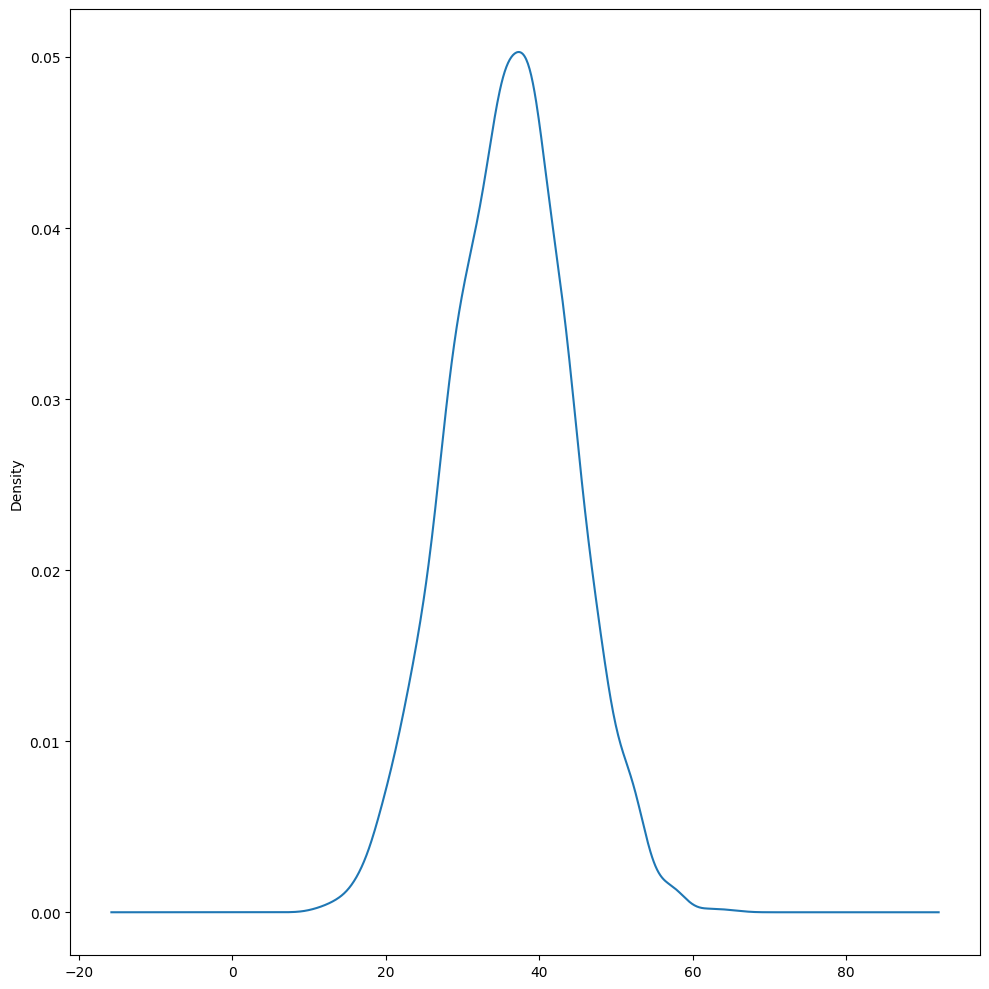

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))  
for i, col in enumerate(gaussian_cols):
    processed_data[col].plot(kind='density', ax=axes, subplots=True, sharex=False)
plt.tight_layout()
plt.show()

In [23]:
gaussian_data = processed_data[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [24]:
basic_info_gaussian

,pctpubliccoverage
count,3047.000000
mean,36.252642
std,7.841741
min,11.200000
25%,30.900000
50%,36.300000
75%,41.550000
max,65.100000


In [25]:
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]  
basic_info_gaussian

,pctpubliccoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [26]:
# dealing with outlier values for incidencerate column
print("Highest allowed",basic_info_gaussian["pctpubliccoverage"]["mean"] + 3*basic_info_gaussian['pctpubliccoverage']["std"])
print("Lowest allowed",basic_info_gaussian["pctpubliccoverage"]["mean"] - 3*basic_info_gaussian['pctpubliccoverage']["std"])

processed_data[(processed_data['pctpubliccoverage'] > 59.777864755203105) | (processed_data['pctpubliccoverage'] < 12.727419130586192)]

Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,42.6,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,35.3,34.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,65.3,64.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,36.8,38.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,54.8,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def deal_with_outliers(df, col, basic_info):
    highest_allowed = basic_info[col]["mean"] + 3*basic_info[col]["std"] 
    lowest_allowed = basic_info[col]["mean"] - 3*basic_info[col]["std"]
    df = df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]  
    return df 
cols_have_outliers = []
for col in gaussian_cols:
    df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = df.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

['pctpubliccoverage']


In [28]:
# trimming 
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"] 
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    trimmed_data = processed_data[(processed_data[col] < highest_allowed) & (processed_data[col] > lowest_allowed)]
trimmed_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# capping 
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"] 
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    capped_data = processed_data.copy()
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed
capped_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# remove columns which are categorical and have less than 10 unique values 
cols_to_remove = []
for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        cols_to_remove.append(col) 
print(len(cols_to_remove))
data_for_skewness = processed_data.drop(cols_to_remove, axis=1)

1870


In [31]:
def identify_skewed_cols(df, cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns) 
len(skewed_cols)

16

In [32]:
skewed_data = data_for_skewness[skewed_cols]

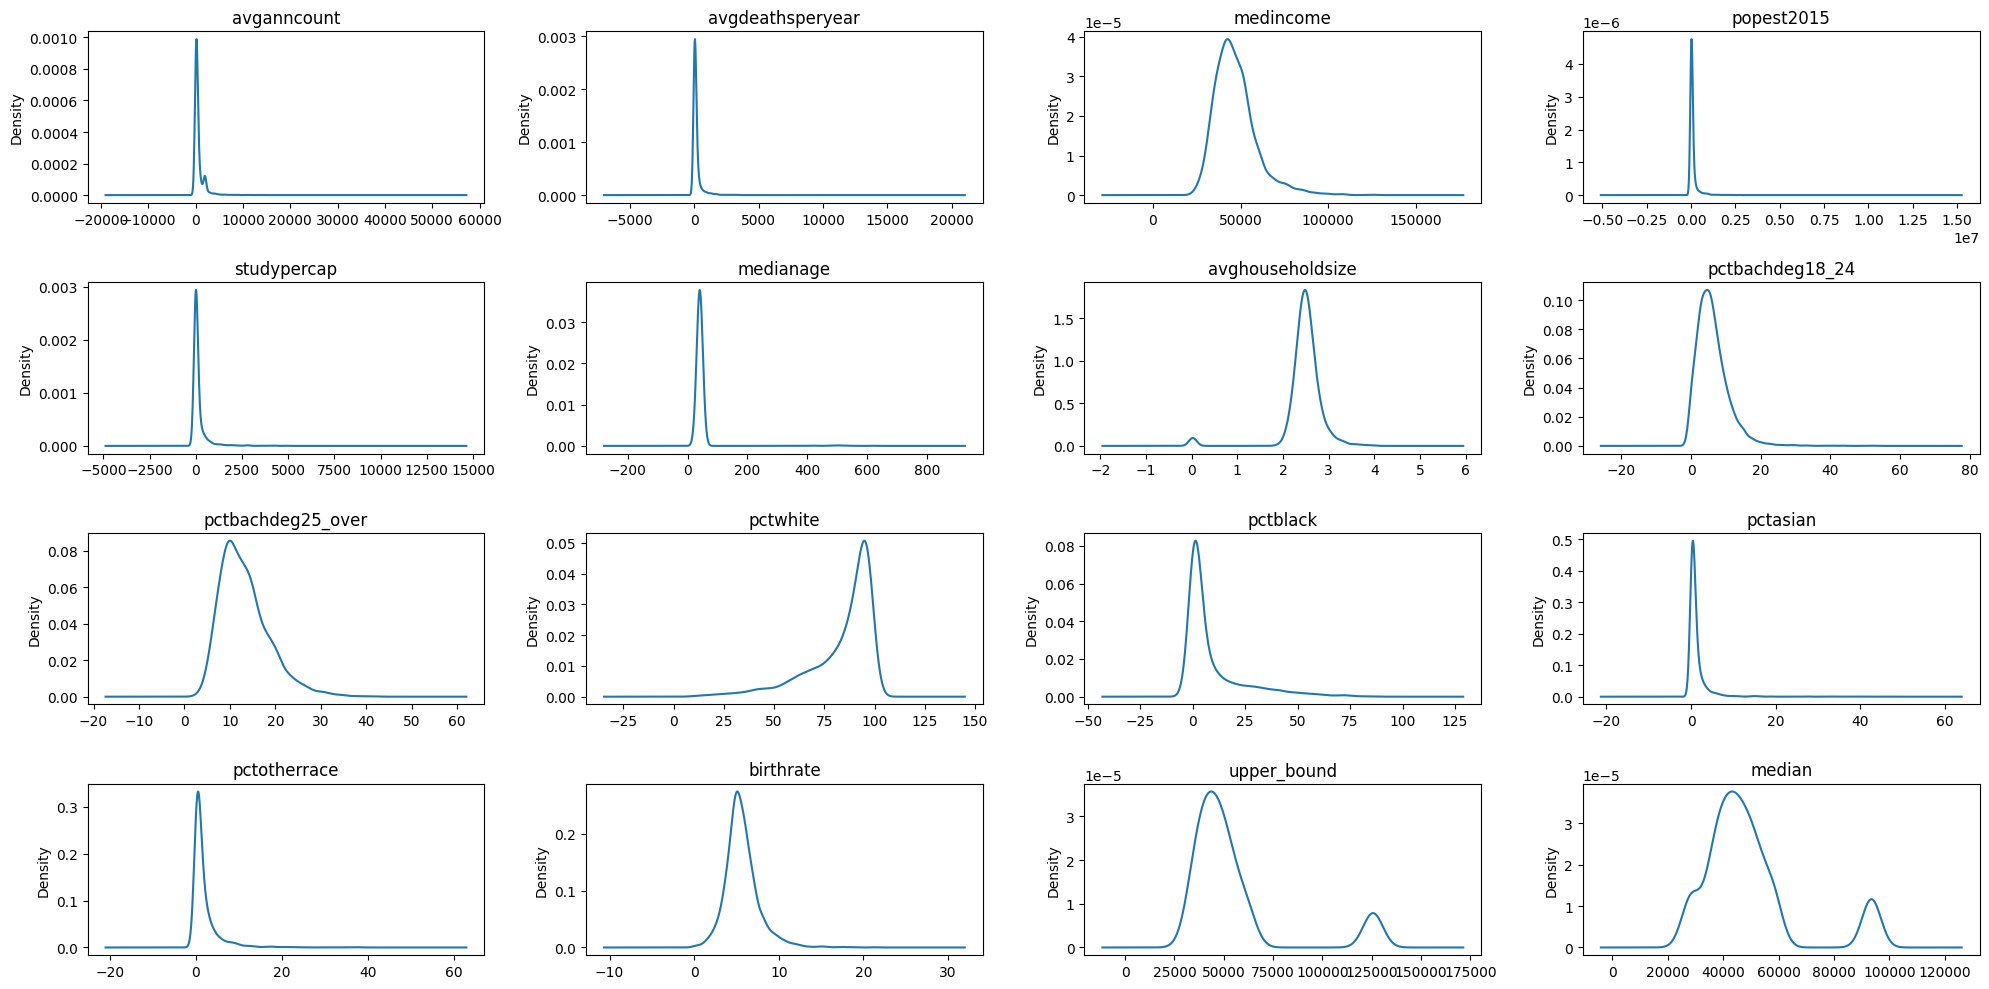

In [33]:
# plot the distribution of the skewed columns which is around 8 columns 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
for i, col in enumerate(skewed_cols): 
    # plot title 
    axes[i//4, i%4].set_title(col)
    skewed_data[col].plot(kind='density', ax=axes[i//4, i%4], subplots=True, sharex=False)
plt.tight_layout()
plt.show()


In [37]:
def box_plot(df, col):
    fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
    fig.update_layout(
        title='Boxplot of ' + col,
        yaxis_title=col,
        width=500,
        height=500)
    fig.show()

for col in skewed_cols:
    box_plot(processed_data, col)

In [40]:
# checking outlier values for studypercap column
percentile25 = processed_data['studypercap'].quantile(0.25)
percentile75 = processed_data['studypercap'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit)]

Upper limit 209.1269406875
Lower limit -125.4761644125


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers
cols_have_outliers_skewed = []
for col in skewed_cols:
    outliers = deal_with_outlier_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)   

['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015', 'studypercap', 'medianage', 'avghouseholdsize', 'pctbachdeg18_24', 'pctbachdeg25_over', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'birthrate', 'upper_bound', 'median']


In [41]:
#Trimming

# find how many values whch are greater than upper limit  and lower than lower limit 
rows_to_remove = processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit)] 
# trim the data
trimmed_data = processed_data[(processed_data['studypercap'] < upper_limit) & (processed_data['studypercap'] > lower_limit)] 
trimmed_data.shape

(2543, 1904)

In [42]:
#Capping

capped_data = processed_data.copy()
capped_data.loc[capped_data['studypercap'] > upper_limit, 'studypercap'] = upper_limit
capped_data.loc[capped_data['studypercap'] < lower_limit, 'studypercap'] = lower_limit
capped_data.shape

(3047, 1904)

In [43]:
def capping(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df 

for col in cols_have_outliers_skewed:
    capped_data = capping(processed_data, col)
capped_data.shape

(3047, 1904)

In [44]:
# box plot of the capped data
for col in cols_have_outliers_skewed:
    box_plot(capped_data, col)